In [73]:
import numpy as np
import pandas as pd


In [74]:
df=pd.read_csv('liver_data.csv')
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [75]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Gender']

0      0
1      1
2      1
3      1
4      1
      ..
578    1
579    1
580    1
581    1
582    1
Name: Gender, Length: 583, dtype: int64

In [76]:
df.dropna()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


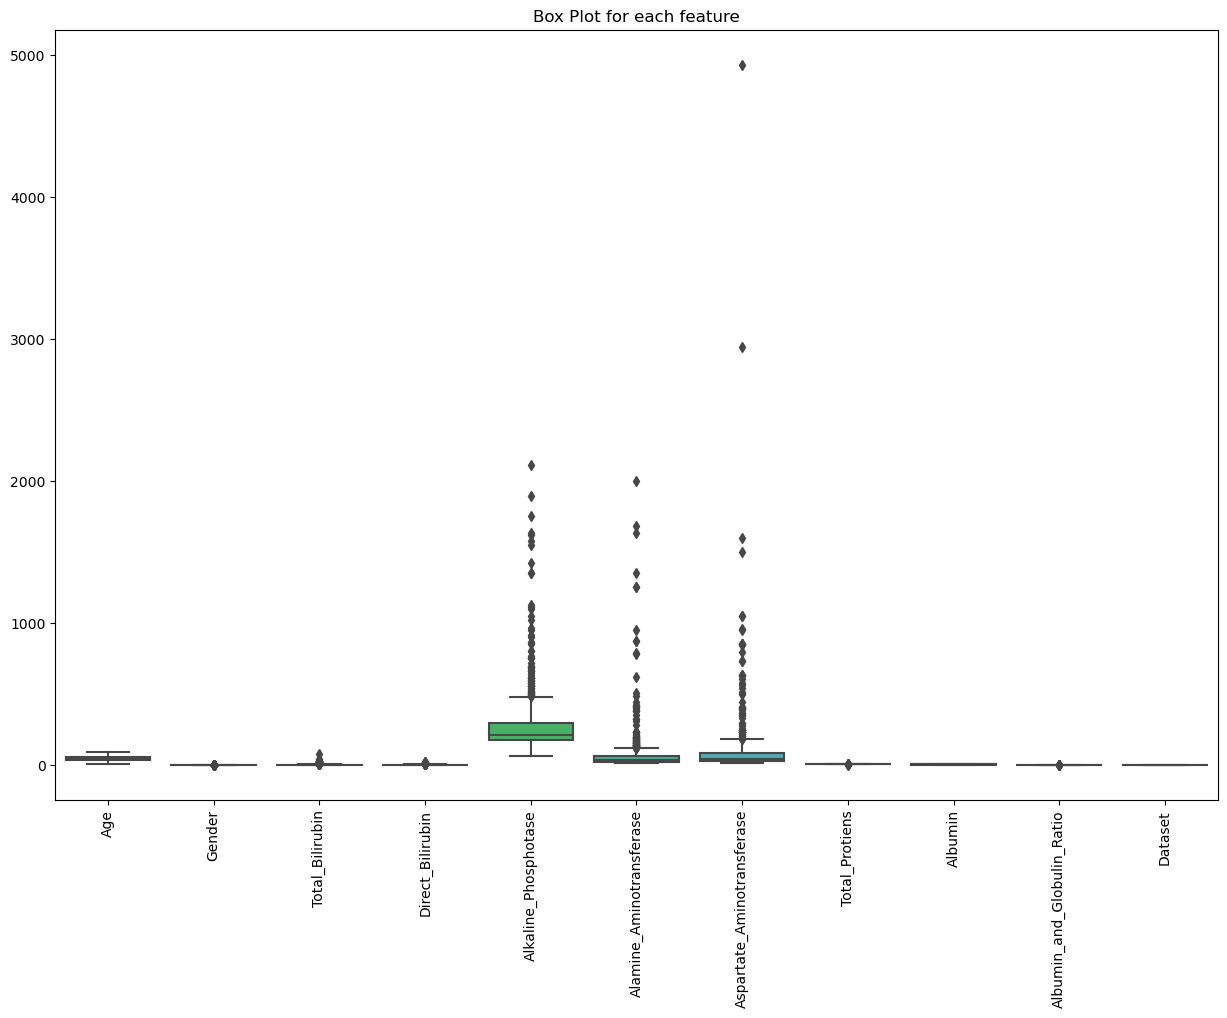

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting box plots for each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot for each feature')
plt.show()


In [78]:
from scipy import stats


# Z-Score Method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 3
outliers_z = np.where(z_scores > threshold)
outliers_data = pd.DataFrame(columns=['Index', 'Column', 'Value'])

# Using pd.concat() instead of df.append()
outliers_list = []
for row, col in zip(outliers_z[0], outliers_z[1]):
    outliers_list.append({'Index': row, 'Column': df.columns[col], 'Value': df.iloc[row, col]})

outliers_data = pd.concat([outliers_data, pd.DataFrame(outliers_list)], ignore_index=True)

print("Outliers using Z-Score method:")
print(outliers_data)


Outliers using Z-Score method:
   Index                    Column   Value
0     25  Alamine_Aminotransferase   875.0
1     26  Alamine_Aminotransferase   875.0
2     27  Alamine_Aminotransferase  1680.0
3     47  Alamine_Aminotransferase  1630.0
4     77      Alkaline_Phosphotase  1620.0
..   ...                       ...     ...
66   559          Direct_Bilirubin    19.7
67   565           Total_Bilirubin    22.5
68   565          Direct_Bilirubin    11.8
69   575           Total_Bilirubin    25.0
70   575          Direct_Bilirubin    13.7

[71 rows x 3 columns]


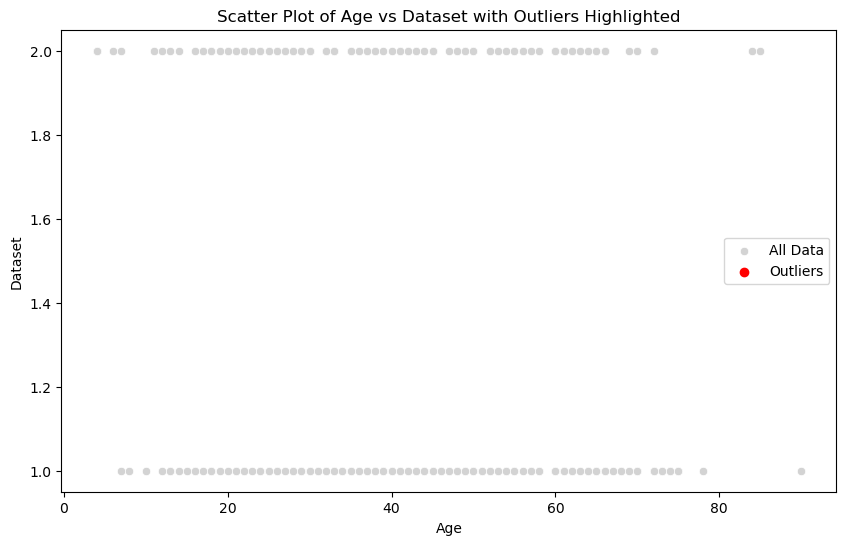

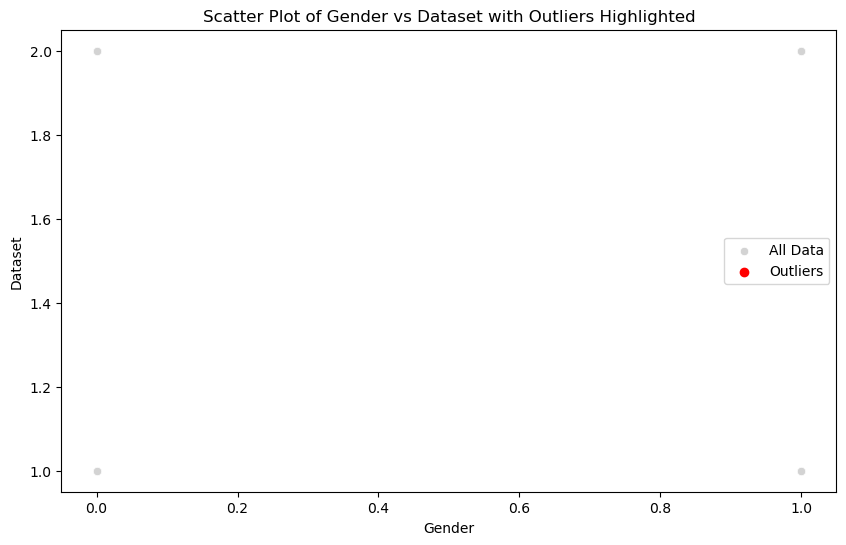

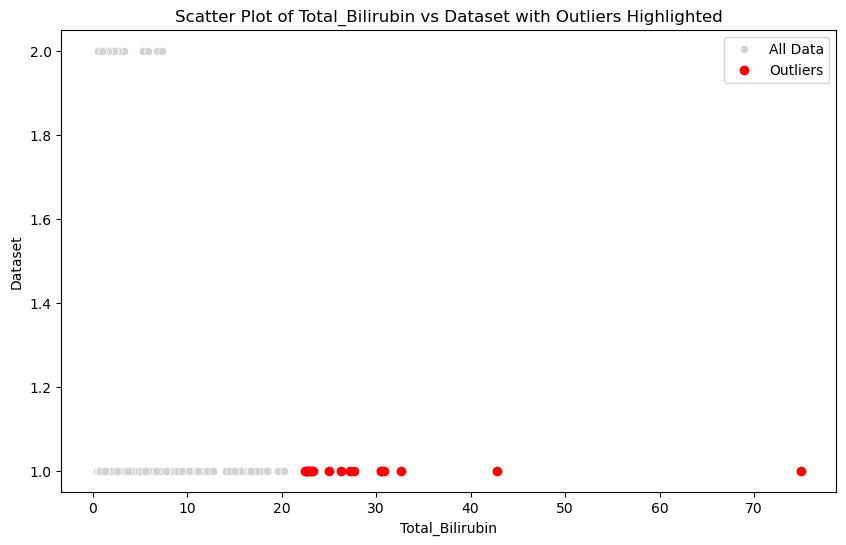

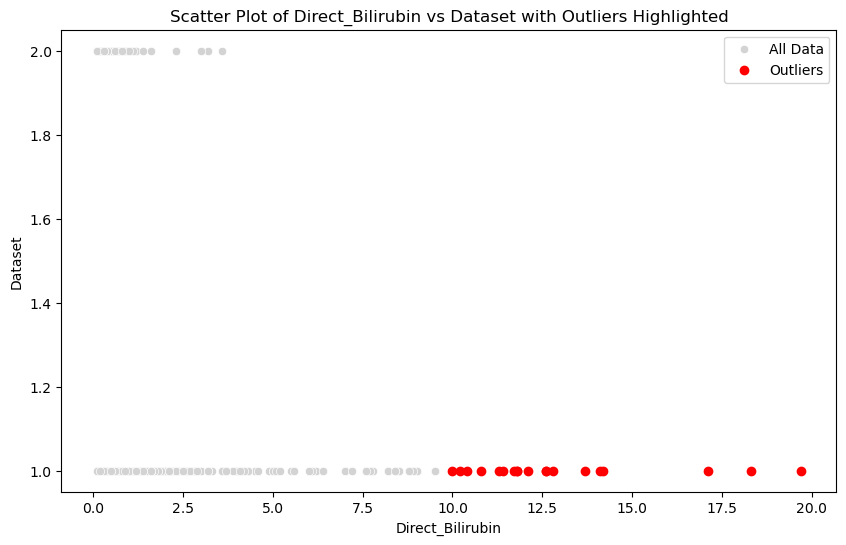

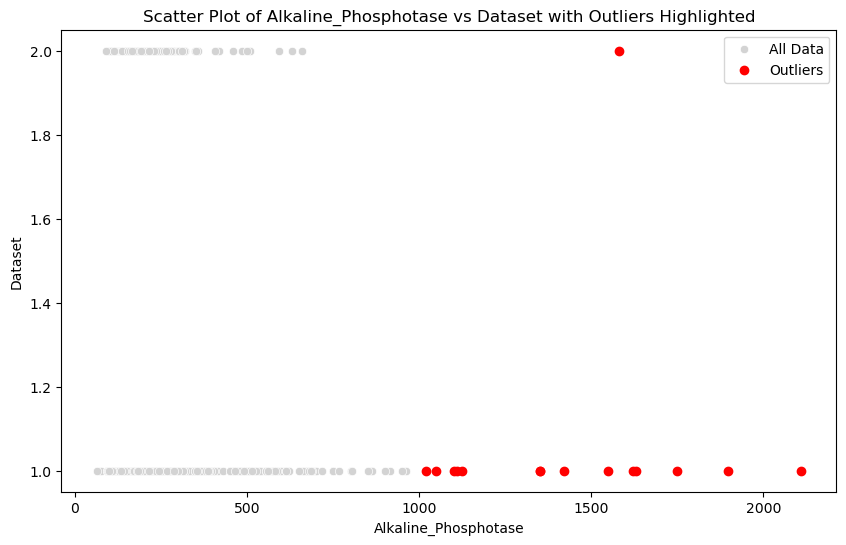

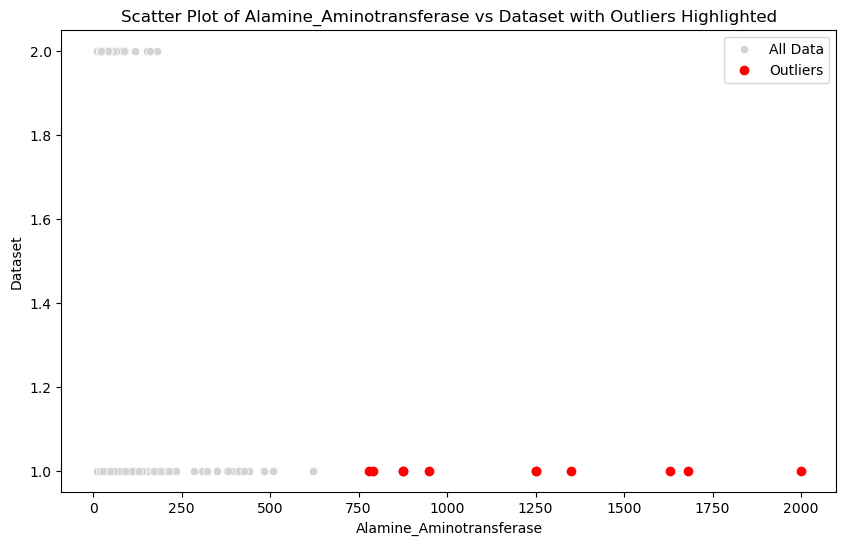

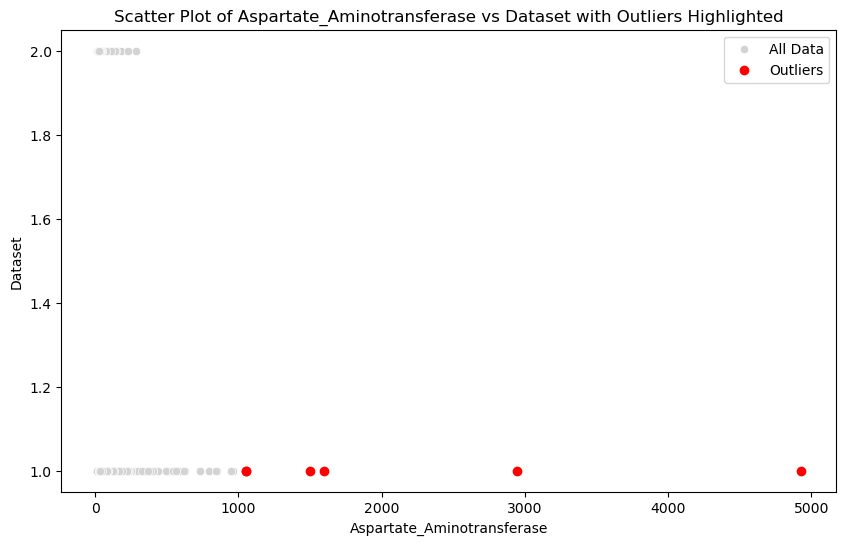

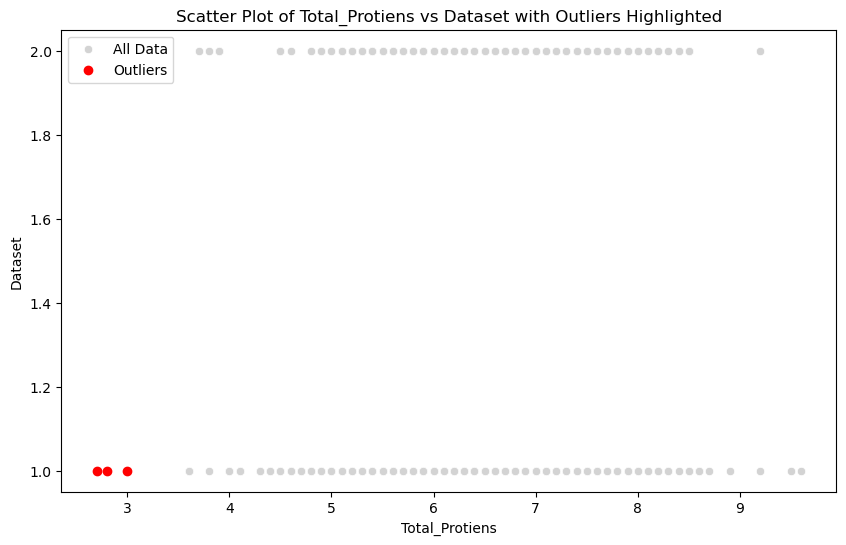

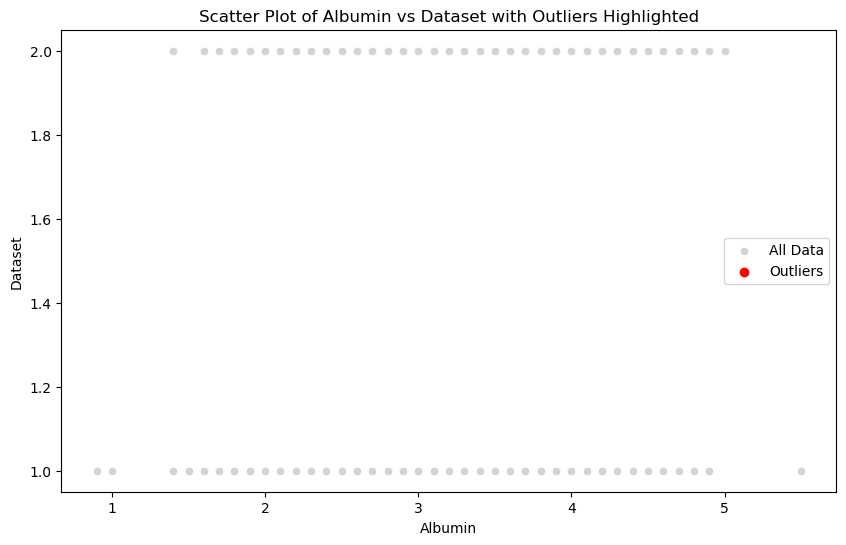

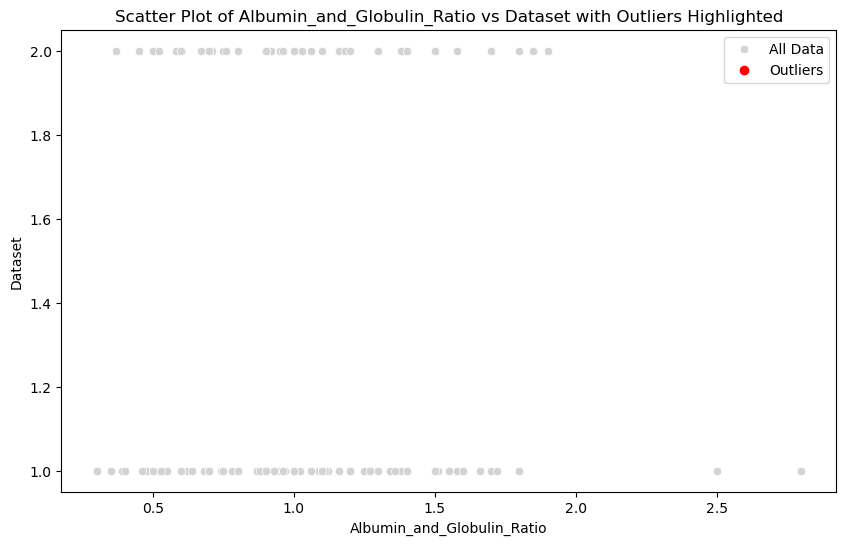

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fixed y-axis column
y_col = 'Dataset'

# Loop through each column (excluding 'Dataset') to create scatter plots
for x_col in df.columns:
    if x_col == y_col:
        continue  # Skip the fixed y-axis column

    plt.figure(figsize=(10, 6))

    # Plot scatter plot for the current x_col and fixed y_col
    sns.scatterplot(x=df[x_col], y=df[y_col], color='lightgray', label='All Data')

    # Highlight outliers
    outliers_x_col = outliers_data[outliers_data['Column'] == x_col]
    outliers_y_col = outliers_data[outliers_data['Column'] == y_col]

    plt.scatter(outliers_x_col['Value'], df.loc[outliers_x_col['Index'], y_col], color='red', label='Outliers')

    plt.title(f'Scatter Plot of {x_col} vs {y_col} with Outliers Highlighted')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()


I was checking if the outliers have an impact on whether or not have disease

In [80]:
# Drop duplicates from outliers_data in case of multiple outlier detections
outliers_data = outliers_data.drop_duplicates(subset=['Index'])

# Get the unique indices of all outliers
indices_to_drop = outliers_data['Index'].unique()

# Drop the indices from the original DataFrame
df_cleaned = df.drop(indices_to_drop)

# Optionally, display the cleaned DataFrame or check its shape
print("DataFrame after dropping all outliers:")
print(df_cleaned.head())
print(f"Original shape: {df.shape}")
print(f"New shape: {df_cleaned.shape}")

DataFrame after dropping all outliers:
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.

In [89]:
df=df_cleaned



In [91]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load your dataset


# Separate features and target variable
X = df.drop(columns=['Dataset'])
y = df['Dataset']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Define and evaluate Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')

# Define and evaluate K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}')

# Define and evaluate RandomForestClassifier with GridSearchCV
rf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print("Best parameters found for Random Forest:", grid_search_rf.best_params_)


Logistic Regression Accuracy: 0.70
K-Nearest Neighbors Accuracy: 0.63
Random Forest Accuracy: 0.71
Best parameters found for Random Forest: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 50}


In [92]:
from sklearn.ensemble import GradientBoostingClassifier

# Define and evaluate Gradient Boosting Classifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f'Gradient Boosting Accuracy: {accuracy_gbm:.2f}')


Gradient Boosting Accuracy: 0.66


In [93]:
from sklearn.svm import SVC

# Define and evaluate Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Support Vector Classifier Accuracy: {accuracy_svc:.2f}')




Support Vector Classifier Accuracy: 0.69


In [96]:
from sklearn.ensemble import VotingClassifier

# Define and evaluate Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('log_reg', LogisticRegression(max_iter=1000)),
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier(n_estimators=100))
], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Accuracy: {accuracy_voting:.2f}')


Voting Classifier Accuracy: 0.67


In [97]:
from sklearn.neural_network import MLPClassifier

# Define and evaluate MLP Classifier
mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'MLP Classifier Accuracy: {accuracy_mlp:.2f}')


MLP Classifier Accuracy: 0.65


In [98]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Optimized Random Forest Accuracy: {accuracy_best_rf:.2f}')
print("Best parameters found:", grid_search.best_params_)


Optimized Random Forest Accuracy: 0.67
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [99]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_rf_random = random_search.best_estimator_

# Evaluate the best model
y_pred_best_rf_random = best_rf_random.predict(X_test)
accuracy_best_rf_random = accuracy_score(y_test, y_pred_best_rf_random)
print(f'Optimized Random Forest (RandomizedSearchCV) Accuracy: {accuracy_best_rf_random:.2f}')
print("Best parameters found:", random_search.best_params_)


Optimized Random Forest (RandomizedSearchCV) Accuracy: 0.65
Best parameters found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': True}
